In [1]:
# In this project, we will use a dataset that contains the chemical properties of wine to see which of
# contribute best to making a good wine

# Read in the relevant libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wine = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Let's inspect the dataset for null values
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# No null values, making this an easy dataset to work with
# Let's inspect the "quality" column to see what values are contained there, as it is int64 rather
# than float64
wine["quality"].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

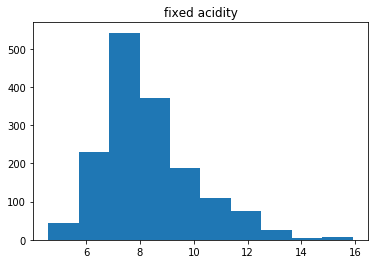

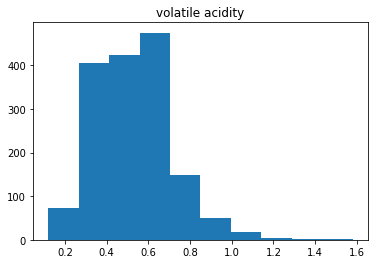

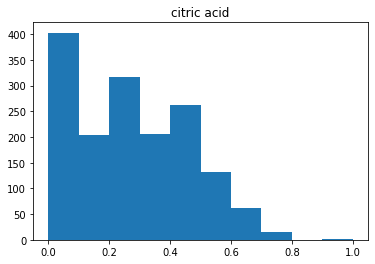

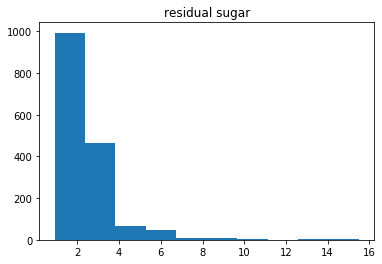

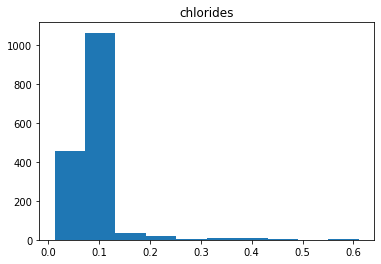

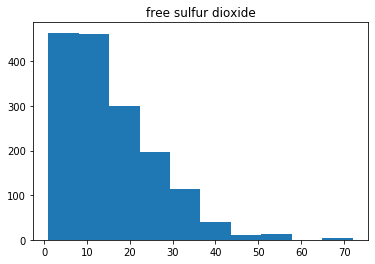

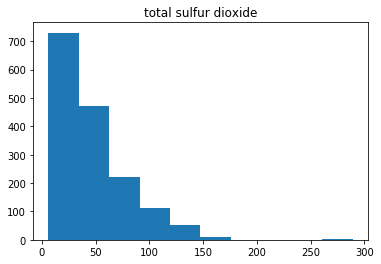

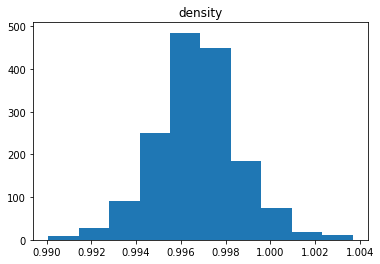

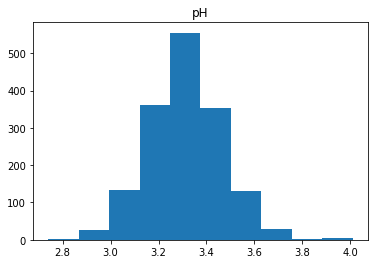

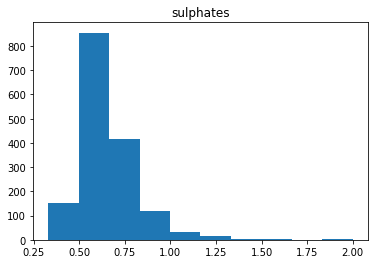

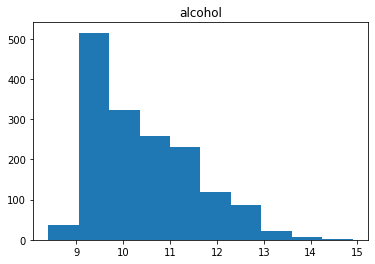

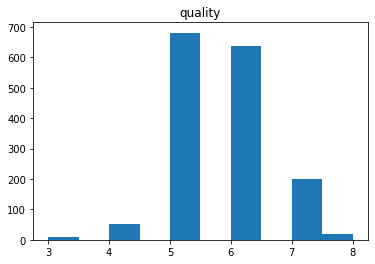

In [4]:
# These look like ratings out of 10, varying between 3 and 8, hence why this is an integer column and
# not a float

# We can visualise each column to see the respective ranges in values that each one has
for column in wine.columns:
    plt.hist(wine[column])
    plt.title(str(column))
    plt.show()
    


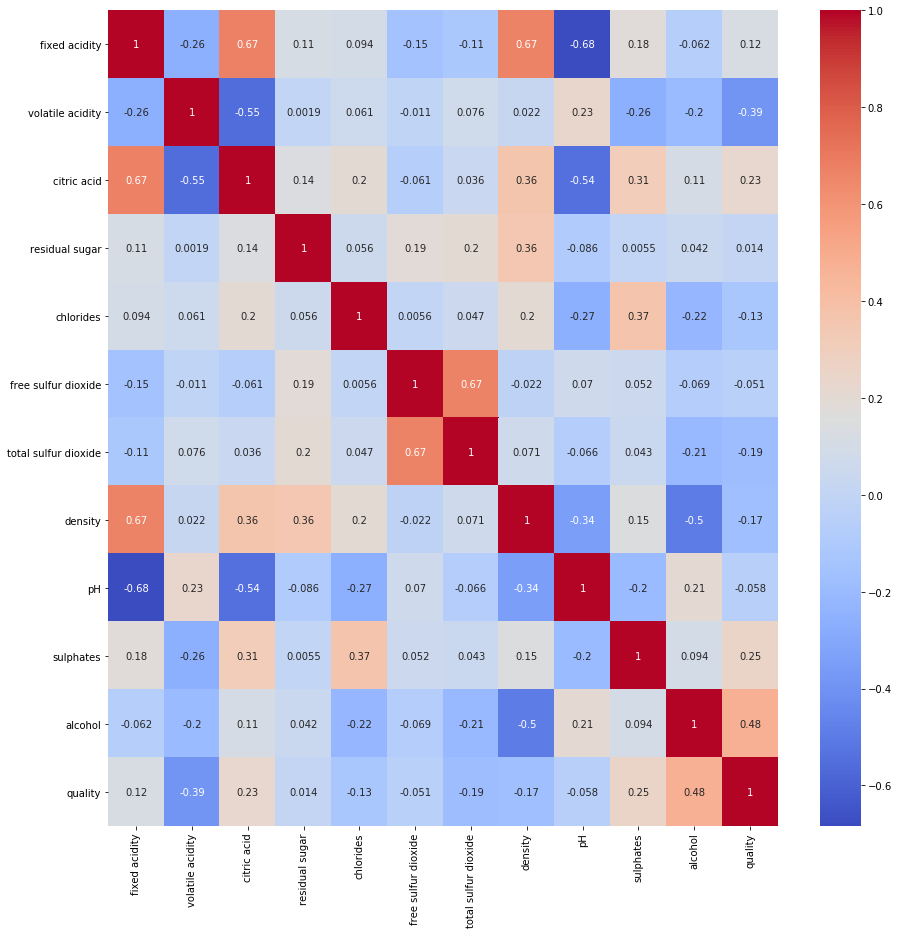

In [5]:
# Here we can see, at a glance, the skews and the ranges of our different features. The ranges vary 
# a lot, so we will have to normalise before putting the data through any machine learning algorithm

# To choose which features we put into the algorithm, let's see where the strongest correlations are
# in the dataset
plt.figure(figsize=(15,15))
sns.heatmap(wine.corr(), cmap="coolwarm", annot=True)

In [6]:
# Our strongest positive correlations are alcohol, sulphates and citric acid, while the only notable
# negative correlation is volatile acidity. Let's use these to build a simple linear regression model
# to start with
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
lr = LinearRegression()
features = ["alcohol", "sulphates", "citric acid", "volatile acidity"]
x = wine[features]
y = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
accuracy = lr.score(x_test, y_test)
print("RMSE: ", rmse)
print("Accuracy: ", accuracy)


RMSE:  0.6227445630820713
Accuracy:  0.3183104457494832


In [7]:
# We see here that our RMSE is 0.62, which is okay, but nothing special, given our values only vary
# between 3 and 8. The accuracy score is low as well. This may be because we haven't scaled our 
# data properly and one feature is having an outsize effect on the predictions. Let's scale our
# data and see if we get better results
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.fit_transform(x_test)
lr2 = LinearRegression()
lr2.fit(scaled_train, y_train)
predictions2 = lr2.predict(scaled_test)
mse2 = mean_squared_error(predictions2, y_test)
rmse2 = np.sqrt(mse2)
accuracy2 = lr2.score(x_test, y_test)
print("RMSE: ", rmse2)
print("Accuracy: ", accuracy2)


RMSE:  0.6583088161200394
Accuracy:  -733.0321326648832


In [9]:
# In fact, the RMSE got worse here, and the accuracy is awful, so in fact our previous model, using
# just the four features, was better

# What if we use just the features that show the strongest postive correlation, alcohol, citric acid
# and sulphates?
new_features = ["alcohol", "sulphates", "citric acid"]
x = wine[new_features]
y = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr3 = LinearRegression()
lr3.fit(x_train, y_train)
predictions3 = lr3.predict(x_test)
mse3 = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse3)
accuracy3 = lr3.score(x_test, y_test)
print("RMSE: ", rmse2)
print("Accuracy: ", accuracy3)

RMSE:  0.6583088161200394
Accuracy:  0.2778073026238401


In [ ]:
# Both accuracy and RMSE are worse that for the first model 